In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
import seaborn as sns
import csv

In [4]:
loan_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv" )

In [5]:
loan_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [6]:
loan_data.dtypes

Unnamed: 0             int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [7]:
loan_data.shape

(491, 14)

In [8]:
loan_data.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
loan_data['Gender']

0      Female
1        Male
2      Female
3        Male
4        Male
        ...  
486       NaN
487    Female
488      Male
489      Male
490      Male
Name: Gender, Length: 491, dtype: object

In [10]:
loan_data['Gender'] = loan_data['Gender'].map({'Male': 0,'Female': 1})

In [11]:
loan_data['Gender']

0      1.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
486    NaN
487    1.0
488    0.0
489    0.0
490    0.0
Name: Gender, Length: 491, dtype: float64

In [12]:
Gender_mean = loan_data['Gender'].mean()

In [13]:
loan_data['Gender'] = loan_data['Gender'].fillna(Gender_mean)

In [14]:
loan_data.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                0
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [17]:
loan_data['Married'] = loan_data['Married'].fillna(imp)

In [18]:
loan_data.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                0
Married               0
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
number = LabelEncoder()
loan_data['Dependents'] = number.fit_transform(loan_data['Dependents'].astype('str'))

In [20]:
loan_data['Dependents']

0      0
1      3
2      0
3      0
4      2
      ..
486    1
487    1
488    1
489    0
490    0
Name: Dependents, Length: 491, dtype: int32

In [21]:
mean_dep = loan_data['Dependents'].mean()

In [22]:
mean_dep

0.8268839103869654

In [23]:
loan_data['Dependents']= loan_data['Dependents'].fillna(mean_dep)

In [24]:
loan_data['Self_Employed'] = loan_data['Self_Employed'].fillna(imp)

In [25]:
loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean())

In [26]:
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mean())

In [27]:
loan_data['Credit_History'] = loan_data['Credit_History'].fillna(loan_data['Credit_History'].mean())

In [28]:
loan_data.dtypes

Unnamed: 0             int64
Loan_ID               object
Gender               float64
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [29]:
number = LabelEncoder()
loan_data['Loan_ID'] = number.fit_transform(loan_data['Loan_ID'].astype('str'))

In [30]:
number = LabelEncoder()
loan_data['Married'] = number.fit_transform(loan_data['Married'].astype('str'))

In [31]:
number = LabelEncoder()
loan_data['Education'] = number.fit_transform(loan_data['Education'].astype('str'))

In [32]:
number = LabelEncoder()
loan_data['Self_Employed'] = number.fit_transform(loan_data['Self_Employed'].astype('str'))

In [33]:
loan_data['Property_Area'] = number.fit_transform(loan_data['Property_Area'].astype('str'))

In [34]:
del loan_data['Unnamed: 0']

In [35]:
del loan_data['Property_Area']
del loan_data['Loan_ID']

In [36]:
loan_data.shape

(491, 11)

In [37]:
x = loan_data.drop('Loan_Status',axis = 1)
y = loan_data['Loan_Status']

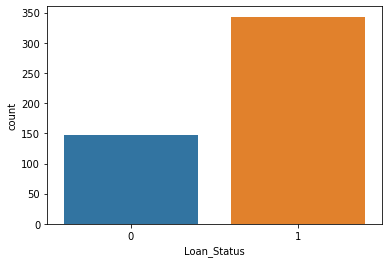

In [38]:
sns.countplot(y)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [40]:
from sklearn.metrics import accuracy_score, f1_score

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
forest = RandomForestClassifier(random_state=1, n_estimators=4, max_depth=3)

In [43]:
forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [44]:
prediction = forest.predict(X_val)

In [45]:
f1_score(Y_val,prediction)

0.847926267281106

# **Test**


In [46]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')

In [47]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [48]:
test_data.isnull().sum()

Loan_ID              0
Gender               3
Married              2
Dependents           6
Education            0
Self_Employed        3
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           6
Loan_Amount_Term     1
Credit_History       7
Property_Area        0
dtype: int64

In [49]:
test_data['Gender'] = test_data['Gender'].map({'Male': 0,'Female': 1})

In [50]:
Gender_mean = test_data['Gender'].mean()

In [51]:
test_data['Gender'] = test_data['Gender'].fillna(Gender_mean)

In [52]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [53]:
test_data['Married'] = test_data['Married'].fillna(imp)

In [54]:
number = LabelEncoder()


In [55]:
test_data['Dependents'] = number.fit_transform(test_data['Dependents'].astype('str'))

In [56]:
mean_dep = test_data['Dependents'].mean()

In [57]:
test_data['Dependents']= test_data['Dependents'].fillna(mean_dep)

In [58]:
test_data['Married'] = number.fit_transform(test_data['Married'].astype('str'))

In [59]:
test_data['Self_Employed'] = test_data['Self_Employed'].fillna(imp)

In [60]:
test_data['LoanAmount'] = test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean())

In [61]:
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mean())

In [62]:
test_data['Credit_History'] = test_data['Credit_History'].fillna(test_data['Credit_History'].mean())

In [63]:

test_data['Loan_ID'] = number.fit_transform(test_data['Loan_ID'].astype('str'))

In [64]:
test_data['Self_Employed'] = number.fit_transform(test_data['Self_Employed'].astype('str'))

In [65]:
test_data['Education'] = number.fit_transform(test_data['Education'].astype('str'))

In [66]:
test_data['Property_Area'] = number.fit_transform(test_data['Property_Area'].astype('str'))

In [67]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [68]:
test_data.dtypes

Loan_ID                int32
Gender               float64
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
dtype: object

In [69]:
del test_data['Loan_ID']
del test_data['Property_Area']

In [70]:
predictions = forest.predict(test_data)

In [73]:
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.

In [74]:
import pickle

with open('classifi_model.pickle','wb') as f :
    pickle.dump(forest,f)

In [76]:
import json
columns = { 'data_columns' : ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
    
}



In [77]:
with open('columns.json','w') as f :
    f.write(json.dumps(columns))